In [7]:
import pandas as pd
import numpy as np

In [8]:
! pwd

/Users/zishuoli/Documents/projects/Wine Visualization/notebook


In [10]:
Reviews = pd.read_csv("../data/winemag-data_first150k.csv")

In [12]:
Reviews.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


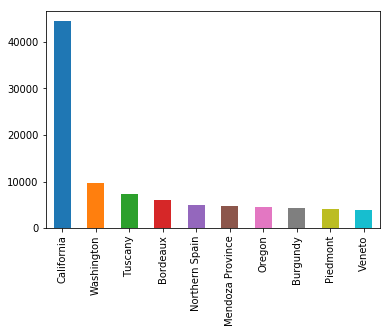

In [14]:
#Histogram of which provice has the most wine production
Reviews['province'].value_counts().head(10).plot.bar()

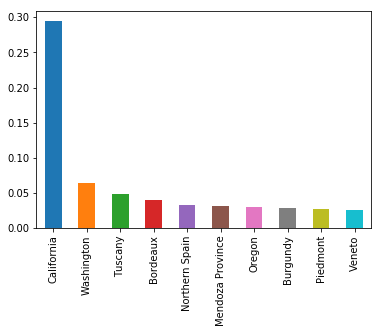

In [15]:
#percentage
(Reviews['province'].value_counts().head(10)/len(Reviews)).plot.bar()

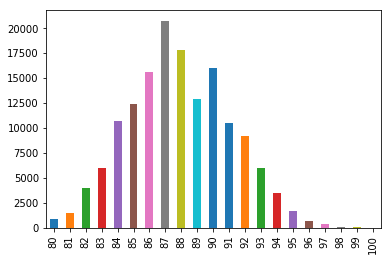

In [16]:
Reviews['points'].value_counts().sort_index().plot.bar()

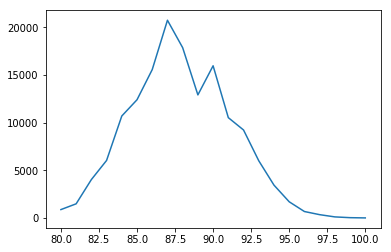

In [17]:
Reviews['points'].value_counts().sort_index().plot.line()

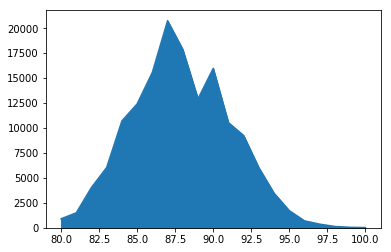

In [19]:
Reviews['points'].value_counts().sort_index().plot.area()

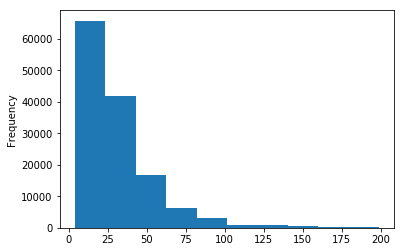

In [21]:
Reviews[Reviews['price'] < 200]['price'].plot.hist()

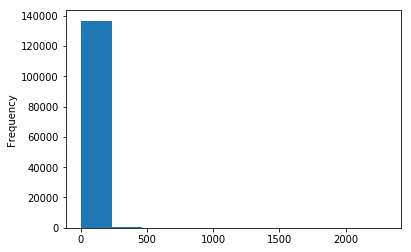

In [23]:
Reviews['price'].plot.hist()

In [25]:
Reviews[Reviews['price'] > 1500]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


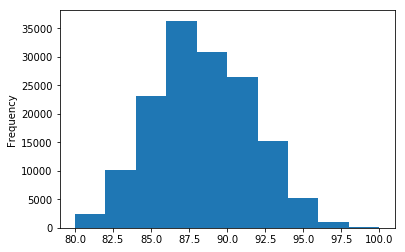

In [26]:
Reviews['points'].plot.hist()

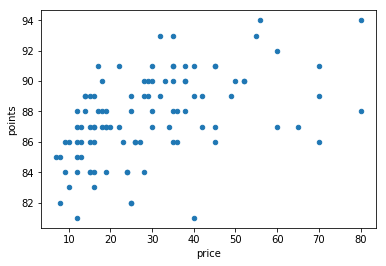

In [27]:
#Bivariate Plotting with Pandas
#Scatter Plot
Reviews[Reviews['price'] < 100].sample(100).plot.scatter(x = 'price',y = 'points')

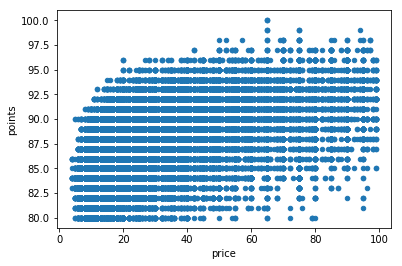

In [28]:
Reviews[Reviews['price'] < 100].plot.scatter(x = 'price',y = 'points')

In [33]:
#Hexplot
import matplotlib.pyplot as plt

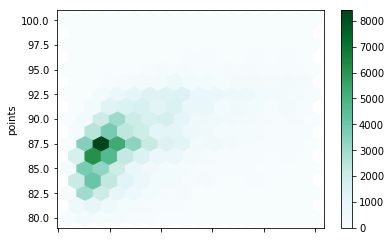

In [35]:
Reviews[Reviews['price'] < 100].plot.hexbin(x = 'price' ,y = 'points',gridsize = 15)

In [36]:
#Stacked plots
Wine_Counts = pd.read_csv('../data/top-five-wine-score-counts.csv')

In [37]:
Wine_Counts.head()

,points,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
0,80,5.0,87.0,68.0,36.0,72.0
1,81,18.0,159.0,150.0,83.0,107.0
2,82,72.0,435.0,517.0,295.0,223.0
3,83,95.0,570.0,669.0,346.0,364.0
4,84,268.0,923.0,1146.0,733.0,602.0


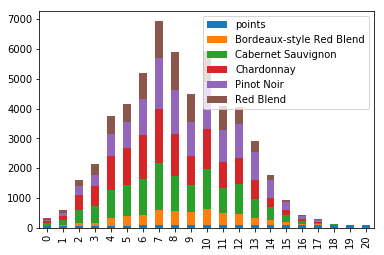

In [42]:
Wine_Counts.plot.bar(stacked=True)

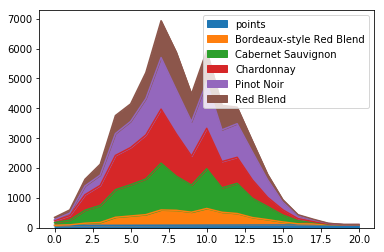

In [43]:
Wine_Counts.plot.area()

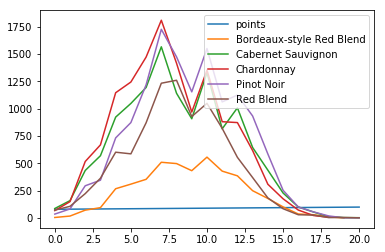

In [44]:
#Bivariate line chart
Wine_Counts.plot.line()

In [46]:
#Exercise
pokemon = pd.read_csv("../data/Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


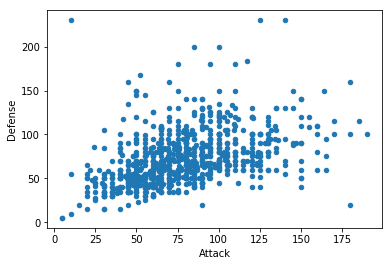

In [48]:
pokemon.plot.scatter(x='Attack',y='Defense')

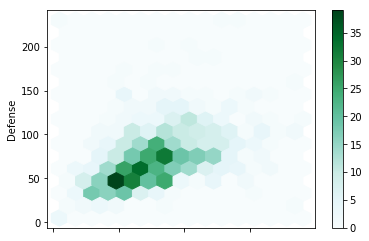

In [51]:
pokemon.plot.hexbin(x='Attack',y='Defense',gridsize = 15)

In [54]:
pokemon_stats_legendary = pokemon.groupby(['Legendary','Generation']).mean()[['Attack','Defense']]

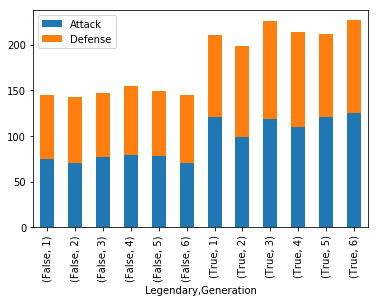

In [55]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [57]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

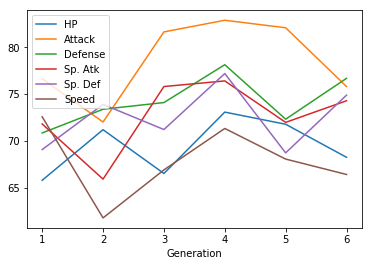

In [59]:
pokemon_stats_by_generation.plot.line()

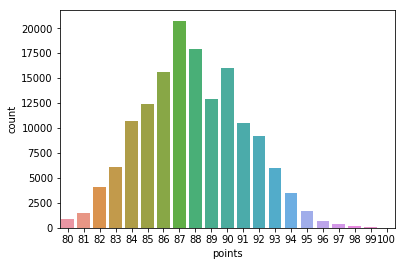

In [61]:
#Plotting with Seaborn
import seaborn as sns
sns.countplot(Reviews['points'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


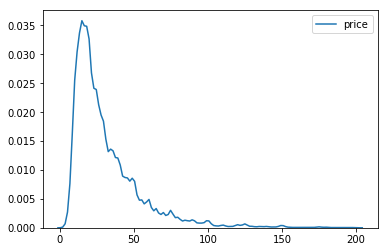

In [62]:
#KDE Plot
sns.kdeplot(Reviews.query('price < 200').price)

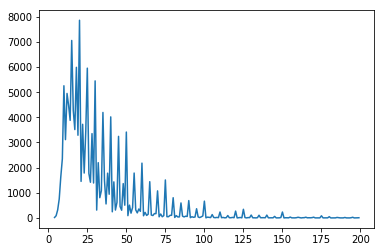

In [64]:
Reviews[Reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


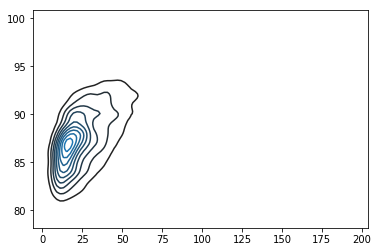

In [68]:
sns.kdeplot(Reviews[Reviews['price'] < 200].loc[:,['price','points']].dropna().sample(5000))

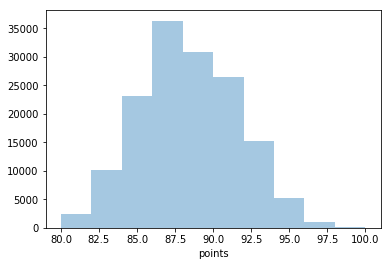

In [70]:
#Distplot
sns.distplot(Reviews['points'],bins = 10,kde = False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


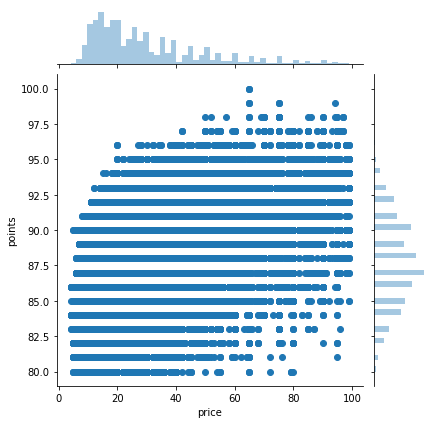

In [71]:
sns.jointplot(x='price',y='points',data=Reviews[Reviews['price'] < 100])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


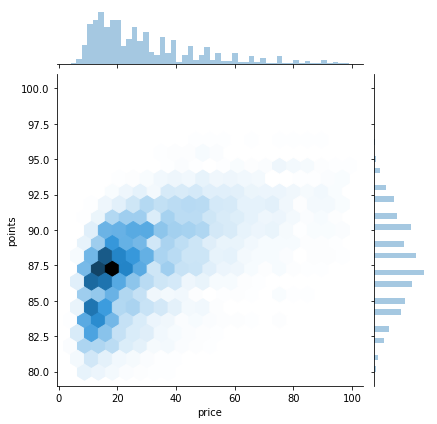

In [72]:
sns.jointplot(x='price',y='points',data=Reviews[Reviews['price']<100],kind = 'hex',gridsize=20)

In [73]:
#Boxplot and violin plot
df = Reviews[Reviews.variety.isin(Reviews.variety.value_counts().head(5).index)]

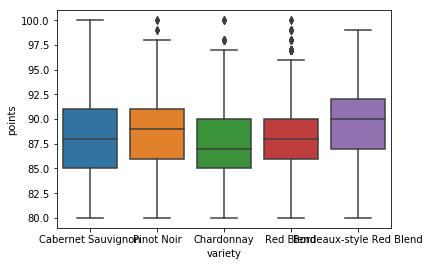

In [74]:
sns.boxplot(x='variety',y='points',data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


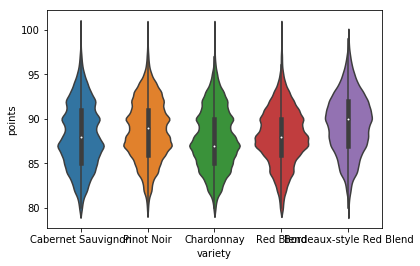

In [75]:
sns.violinplot(x='variety',y='points',data=Reviews[Reviews.variety.isin(Reviews.variety.value_counts()[:5].index)])

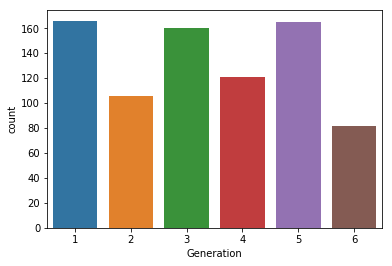

In [77]:
sns.countplot(pokemon['Generation'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


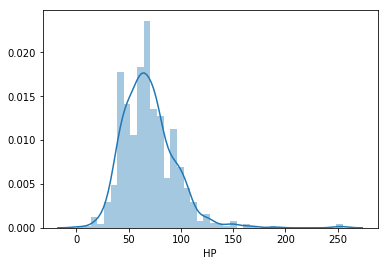

In [78]:
sns.distplot(pokemon['HP'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


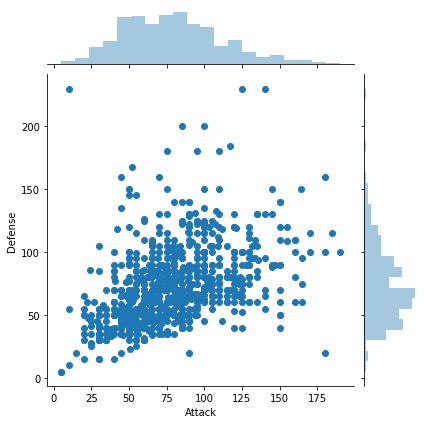

In [79]:
sns.jointplot(x = 'Attack',y = 'Defense',data=pokemon)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


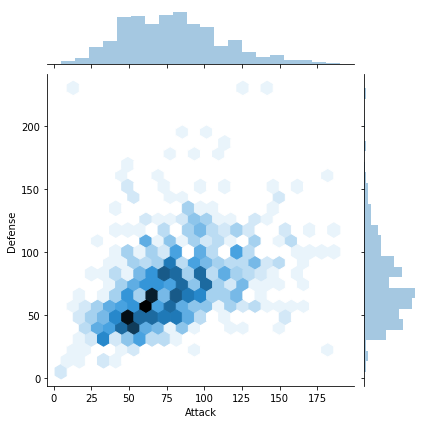

In [80]:
sns.jointplot(x='Attack',y='Defense',data=pokemon,kind='hex')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


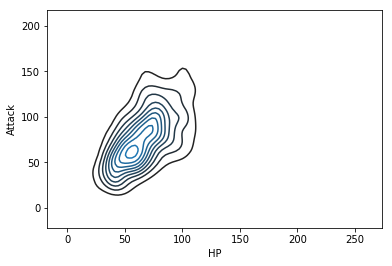

In [81]:
sns.kdeplot(pokemon['HP'],pokemon['Attack'])

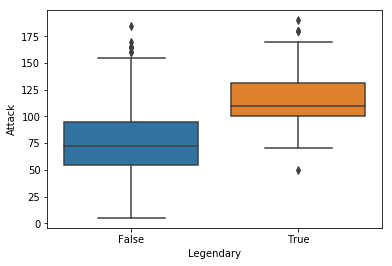

In [82]:
sns.boxplot(x='Legendary',y='Attack',data=pokemon)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


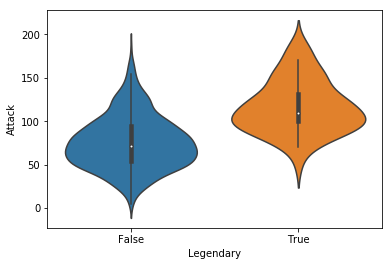

In [83]:
sns.violinplot(x='Legendary',y='Attack',data=pokemon)

In [84]:
#Subplots
import matplotlib.pyplot as plt

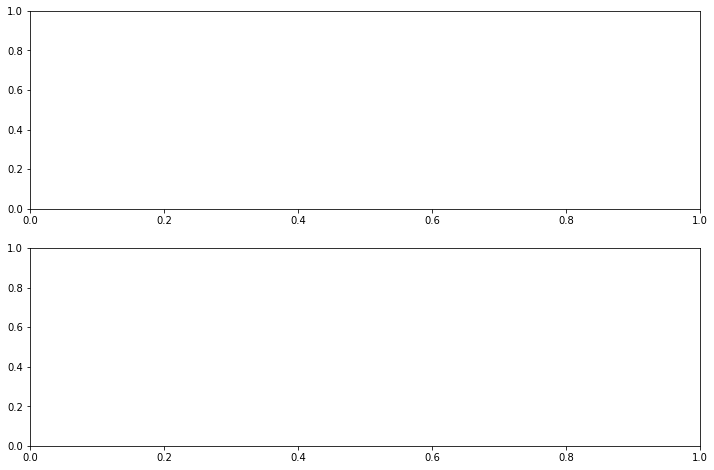

In [92]:
fig,axarr = plt.subplots(2,1,figsize=(12,8))

In [93]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1284682e8>,
      dtype=object)

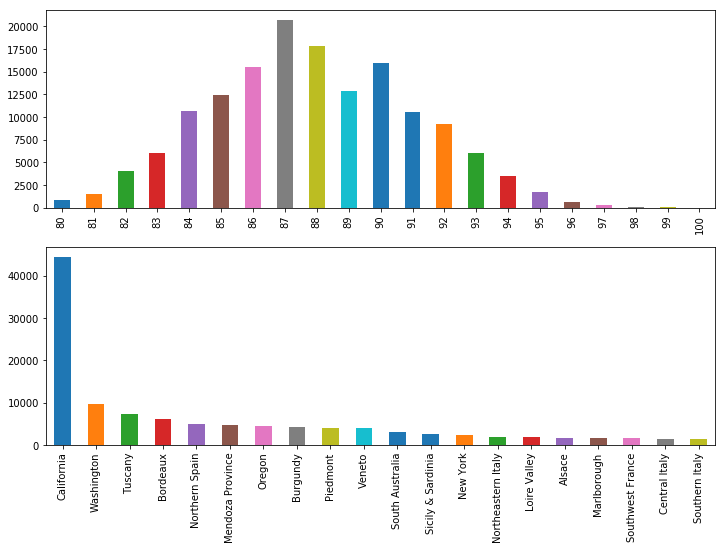

In [95]:
fig,axarr = plt.subplots(2,1,figsize=(12,8))
Reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0])
Reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1])

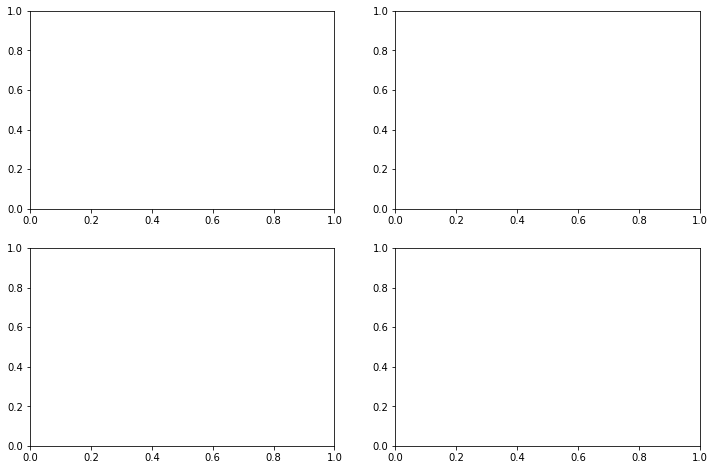

In [97]:
fig,axarr = plt.subplots(2,2,figsize=(12,8))

In [98]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285f5a58>,
      dtype=object)

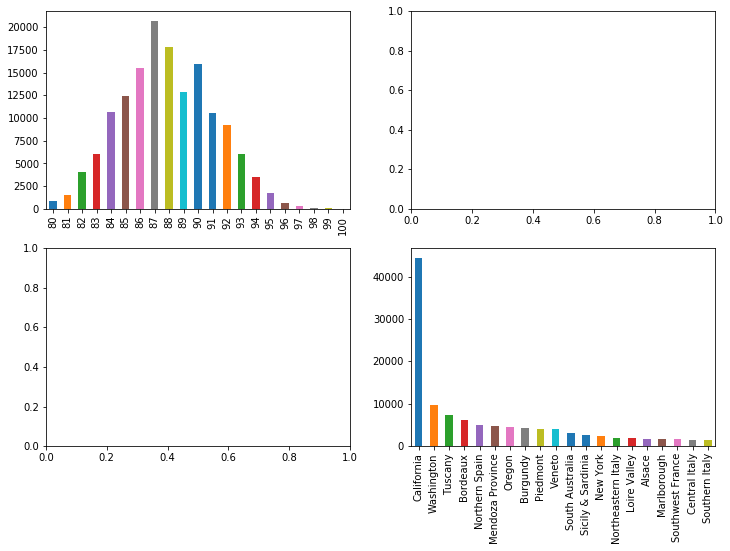

In [100]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

Reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

Reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

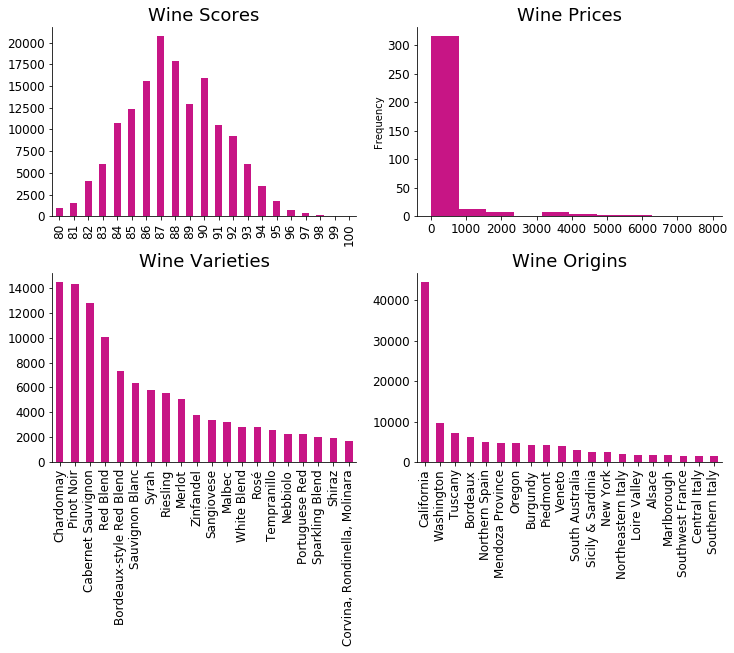

In [104]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

Reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

Reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

Reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

Reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

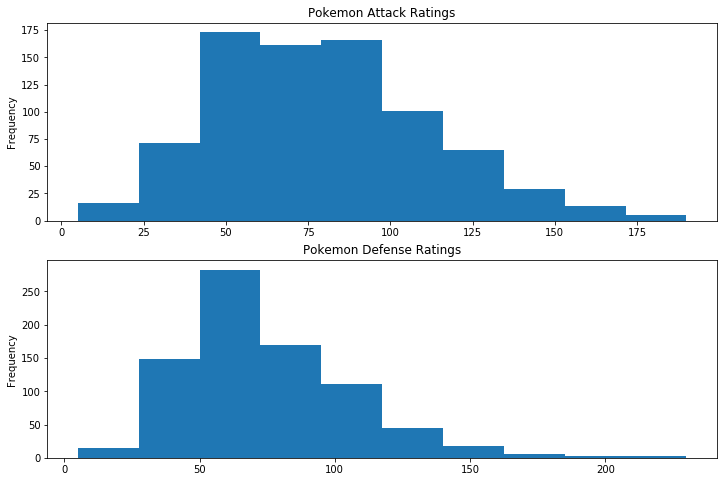

In [120]:
fig,axarr = plt.subplots(2,1,figsize= (12,8))
pokemon['Attack'].plot.hist(ax=axarr[0],title='Pokemon Attack Ratings')
pokemon['Defense'].plot.hist(ax=axarr[1],title='Pokemon Defense Ratings')

In [121]:
#Introduction to plotly
reviews2 = pd.read_csv("../data/winemag-data-130k-v2.csv", index_col=0)
reviews2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [127]:
!pip install plotly

    100% |████████████████████████████████| 37.3MB 1.0MB/s ta 0:00:011
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/zishuoli/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [128]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [131]:
import plotly.graph_objs as go

iplot([go.Scatter(x=reviews2.head(1000)['points'], 
                  y=reviews2.head(1000)['price'], mode='markers')])

In [132]:
#KDE &Scatter Plot
iplot([go.Histogram2dContour(x=reviews2.head(500)['points'], 
                             y=reviews2.head(500)['price'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=reviews2.head(1000)['points'], y=reviews2.head(1000)['price'], mode='markers')])

/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




In [134]:
#Surface
df = reviews2.assign(n=0).groupby(['points', 
                                   'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', 
             columns='points', values='n').fillna(0).values.tolist()






In [135]:
iplot([go.Surface(z=v)])

In [136]:
#Choropleth
df = reviews2['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

In [137]:
#Pokemon Exercise
import plotly.graph_objs as go

iplot([go.Scatter(x=pokemon['Attack'], y=pokemon['Defense'], mode='markers')])

In [142]:
#Plotnine
top_wines = reviews2[reviews2['variety'].isin(reviews2['variety'].value_counts().head(5).index)]



In [143]:

! pip install plotnine 

    100% |████████████████████████████████| 3.6MB 3.2MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 23.9MB/s ta 0:00:01
    100% |████████████████████████████████| 14.1MB 2.7MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 21.3MB/s ta 0:00:01
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
  Found existing installation: matplotlib 2.2.3
    Uninstalling matplotlib-2.2.3:
      Successfully uninstalled matplotlib-2.2.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [145]:
from plotnine import *


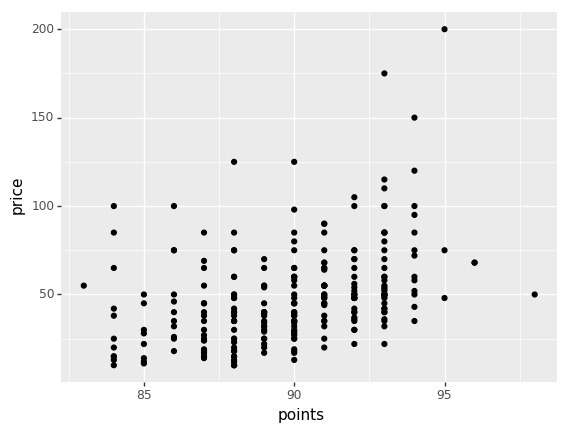

<ggplot: (-9223372029820394471)>

In [146]:
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point())


/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



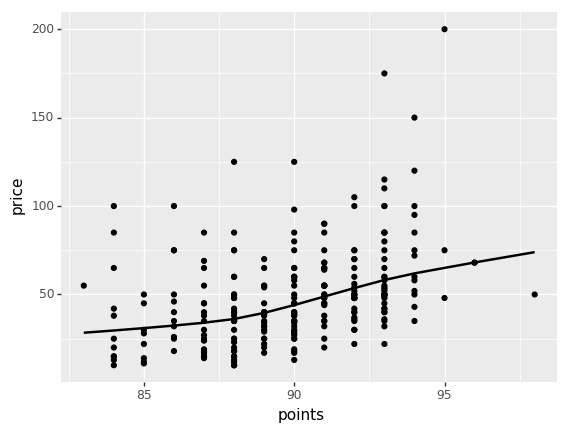

<ggplot: (-9223372029830874522)>

In [147]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + aes('points', 'price')
        + geom_point()
        + stat_smooth()
)

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



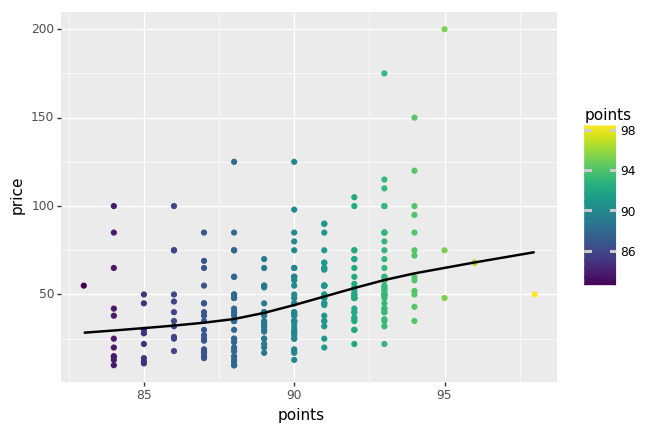

<ggplot: (7034414484)>

In [148]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + geom_point()
        + aes(color='points')
        + aes('points', 'price')
        + stat_smooth()
)

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



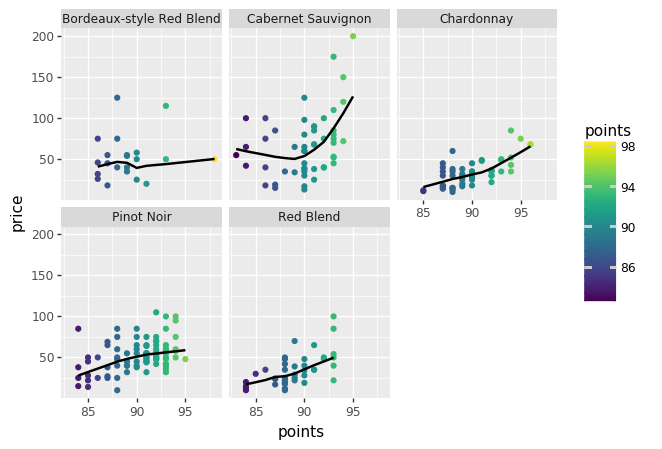

<ggplot: (7034517070)>

In [149]:
df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

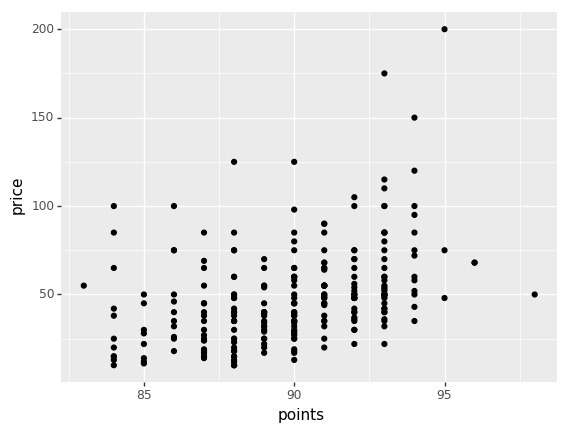

<ggplot: (7029861345)>

In [150]:
(ggplot(df)
 + geom_point(aes('points', 'price'))
)

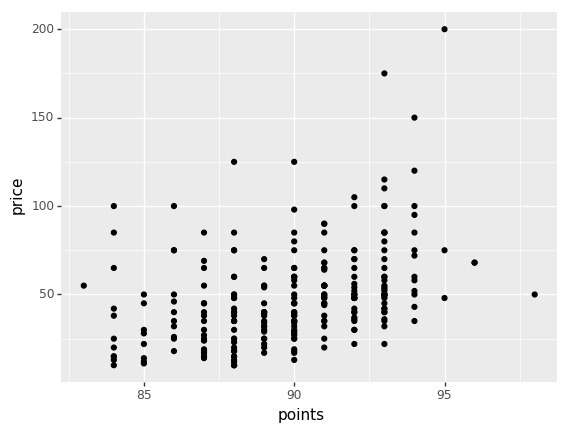

<ggplot: (-9223372029820033241)>

In [151]:
(ggplot(df, aes('points', 'price'))
 + geom_point()
)

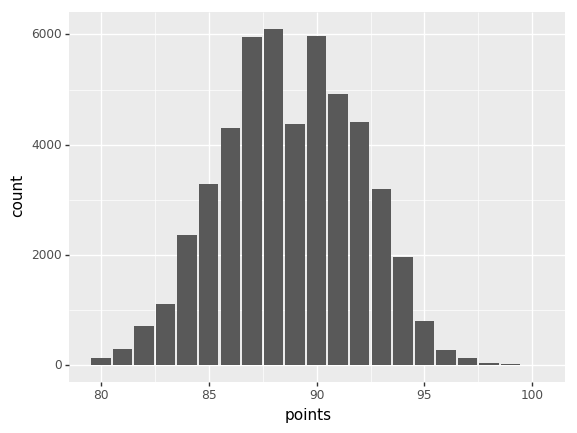

<ggplot: (7034857094)>

In [152]:
(ggplot(top_wines)
     + aes('points')
     + geom_bar()
)

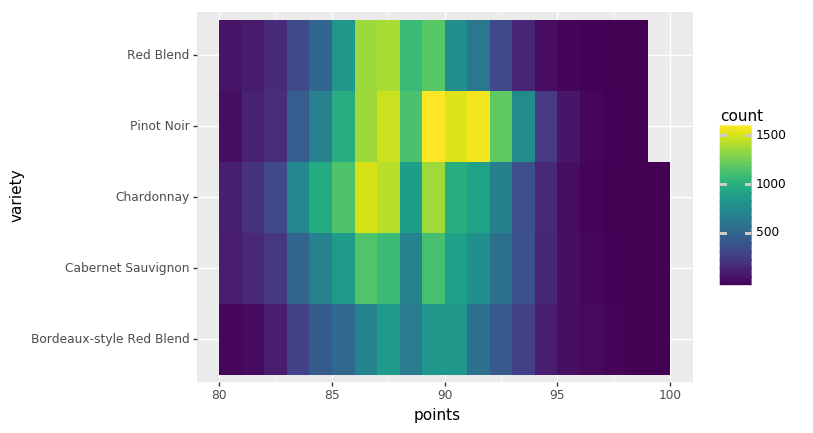

<ggplot: (-9223372029819932174)>

In [153]:
(ggplot(top_wines)
     + aes('points', 'variety')
     + geom_bin2d(bins=20)
)

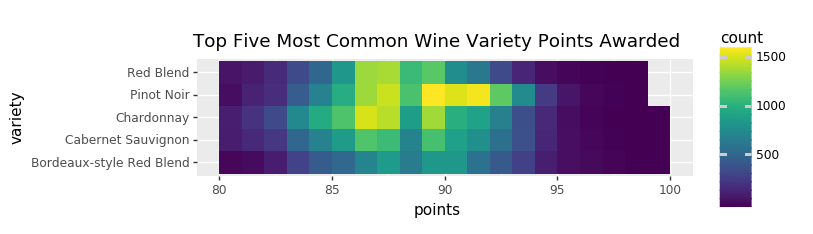

<ggplot: (7023383160)>

In [154]:
(ggplot(top_wines)
         + aes('points', 'variety')
         + geom_bin2d(bins=20)
         + coord_fixed(ratio=1)
         + ggtitle("Top Five Most Common Wine Variety Points Awarded")
)

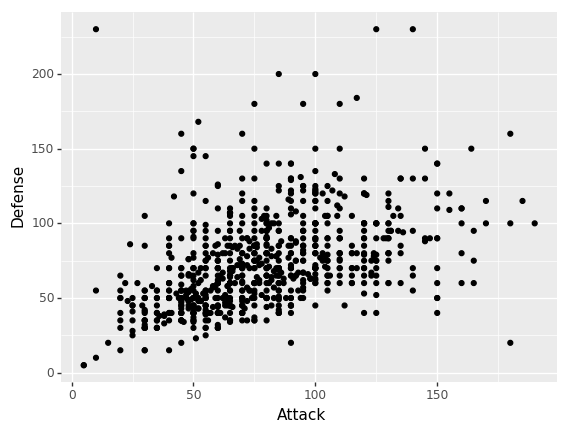

<ggplot: (-9223372029831412946)>

In [157]:
#Pokemon Exercise
( 
    ggplot(pokemon,aes('Attack','Defense'))
        +geom_point())

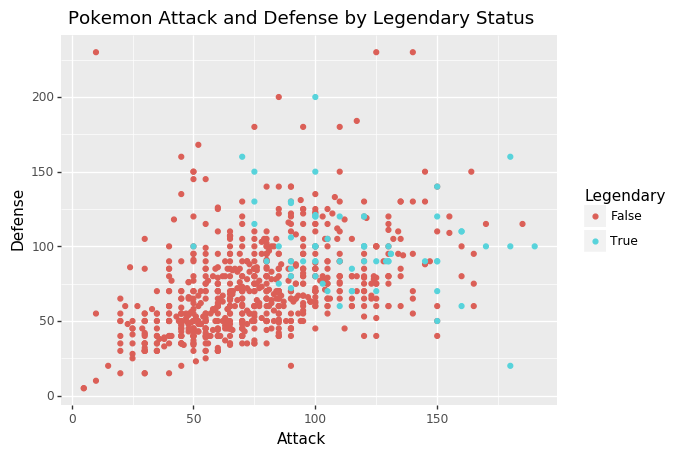

<ggplot: (7035973359)>

In [158]:
(
    ggplot(pokemon,aes(
    'Attack','Defense',color='Legendary'))
    +geom_point()
    +ggtitle("Pokemon Attack and Defense by Legendary Status")
)

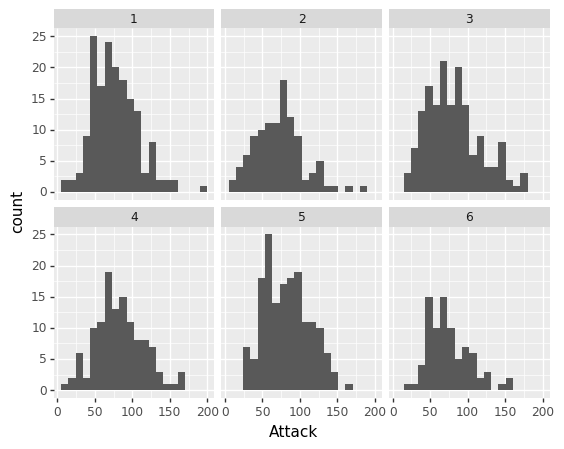

<ggplot: (7035045219)>

In [165]:
(
    ggplot(pokemon,aes('Attack'))
        +geom_histogram(bins=20)
) + facet_wrap('~Generation')